**Data Collection**



In [ ]:
pip install pandas scikit-learn matplotlib seaborn

**Data Preparation and Cleaning**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/index.csv")

# Display the first few rows
print(data.head())

         date datetime cash_type                 card  money    coffee_name
0  01-03-2024  15:50.5      card  ANON-0000-0000-0001   38.7          Latte
1  01-03-2024  19:22.5      card  ANON-0000-0000-0002   38.7  Hot Chocolate
2  01-03-2024  20:18.1      card  ANON-0000-0000-0002   38.7  Hot Chocolate
3  01-03-2024  46:33.0      card  ANON-0000-0000-0003   28.9      Americano
4  01-03-2024  48:14.6      card  ANON-0000-0000-0004   38.7          Latte


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     1133 non-null   datetime64[ns]
 1   cash_type    1133 non-null   object        
 2   card         1044 non-null   object        
 3   money        1133 non-null   float64       
 4   coffee_name  1133 non-null   object        
 5   Month        1133 non-null   int32         
 6   Year         1133 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 53.2+ KB


*Handling Missing Values:*

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical values (if any) with the median
data['money'].fillna(data['money'].median(), inplace=True)

# Fill missing categorical values with the mode
data['cash_type'].fillna(data['cash_type'].mode()[0], inplace=True)
data['coffee_name'].fillna(data['coffee_name'].mode()[0], inplace=True)

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


<Axes: >

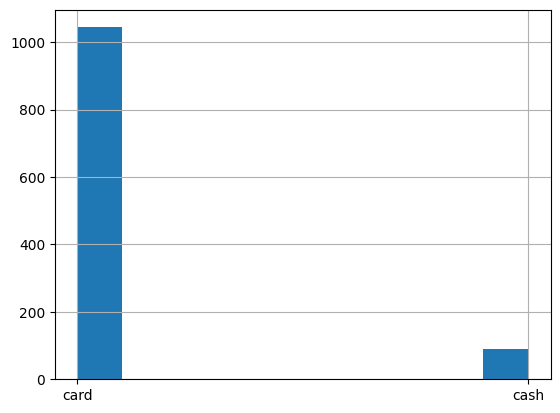

In [ ]:
data['cash_type'].hist()

*Converting Data Types:*

In [ ]:
# Convert datetime to proper datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Check the data types
print(data.dtypes)

datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
Month                   int32
Year                    int32
dtype: object


*Removing Outliers:*

In [ ]:
import numpy as np
from scipy.stats import zscore

# Remove outliers based on Z-score for the 'money' column
data = data[(np.abs(zscore(data[['money']])) < 3).all(axis=1)]

*Feature Engineering:*

In [ ]:
# Extract month and year from the 'datetime' column
data['Month'] = data['datetime'].dt.month
data['Year'] = data['datetime'].dt.year

**Exploratory Data Analysis (EDA)**

*Sales Over Time:*

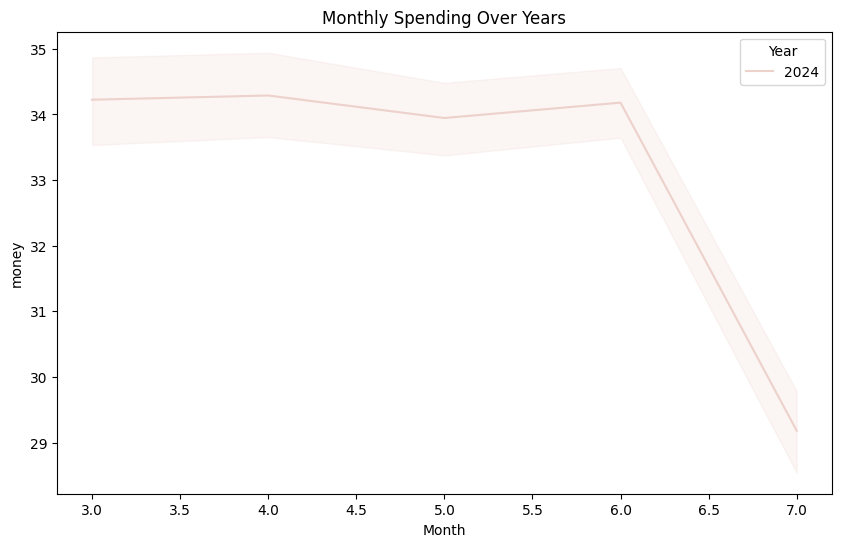

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Money spent over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Month', y='money', hue='Year')
plt.title('Monthly Spending Over Years')
plt.show()


*Spending by Coffee Type:*

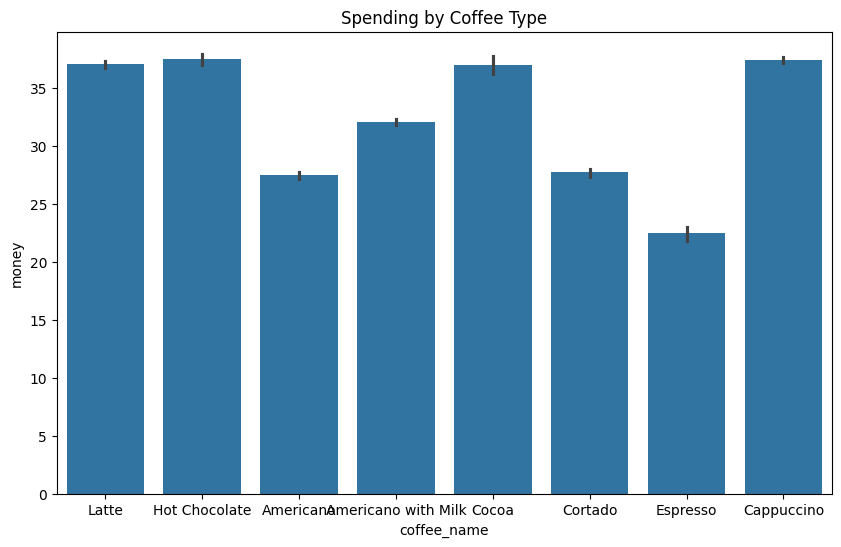

In [ ]:
  # Spending by coffee type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='coffee_name', y='money')
plt.title('Spending by Coffee Type')
plt.show()


**Machine Learning Modeling**

*Splitting the Data:*

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['money', 'datetime', 'card'])  # Drop datetime and card since they don't contribute to prediction
y = data['money']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*Training a Simple Model:*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1.670070299399323
R^2 Score: 0.9102907214057462


**Model Interpretation and Conclusion**

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns,
columns=['Coefficient'])
print(coefficients)

                                  Coefficient
Month                           -1.190539e+00
Year                             3.948231e-15
cash_type_cash                   1.228624e+00
coffee_name_Americano with Milk  5.248990e+00
coffee_name_Cappuccino           1.035152e+01
coffee_name_Cocoa                1.002953e+01
coffee_name_Cortado              1.302621e-01
coffee_name_Espresso            -4.596862e+00
coffee_name_Hot Chocolate        1.000766e+01
coffee_name_Latte                1.003557e+01


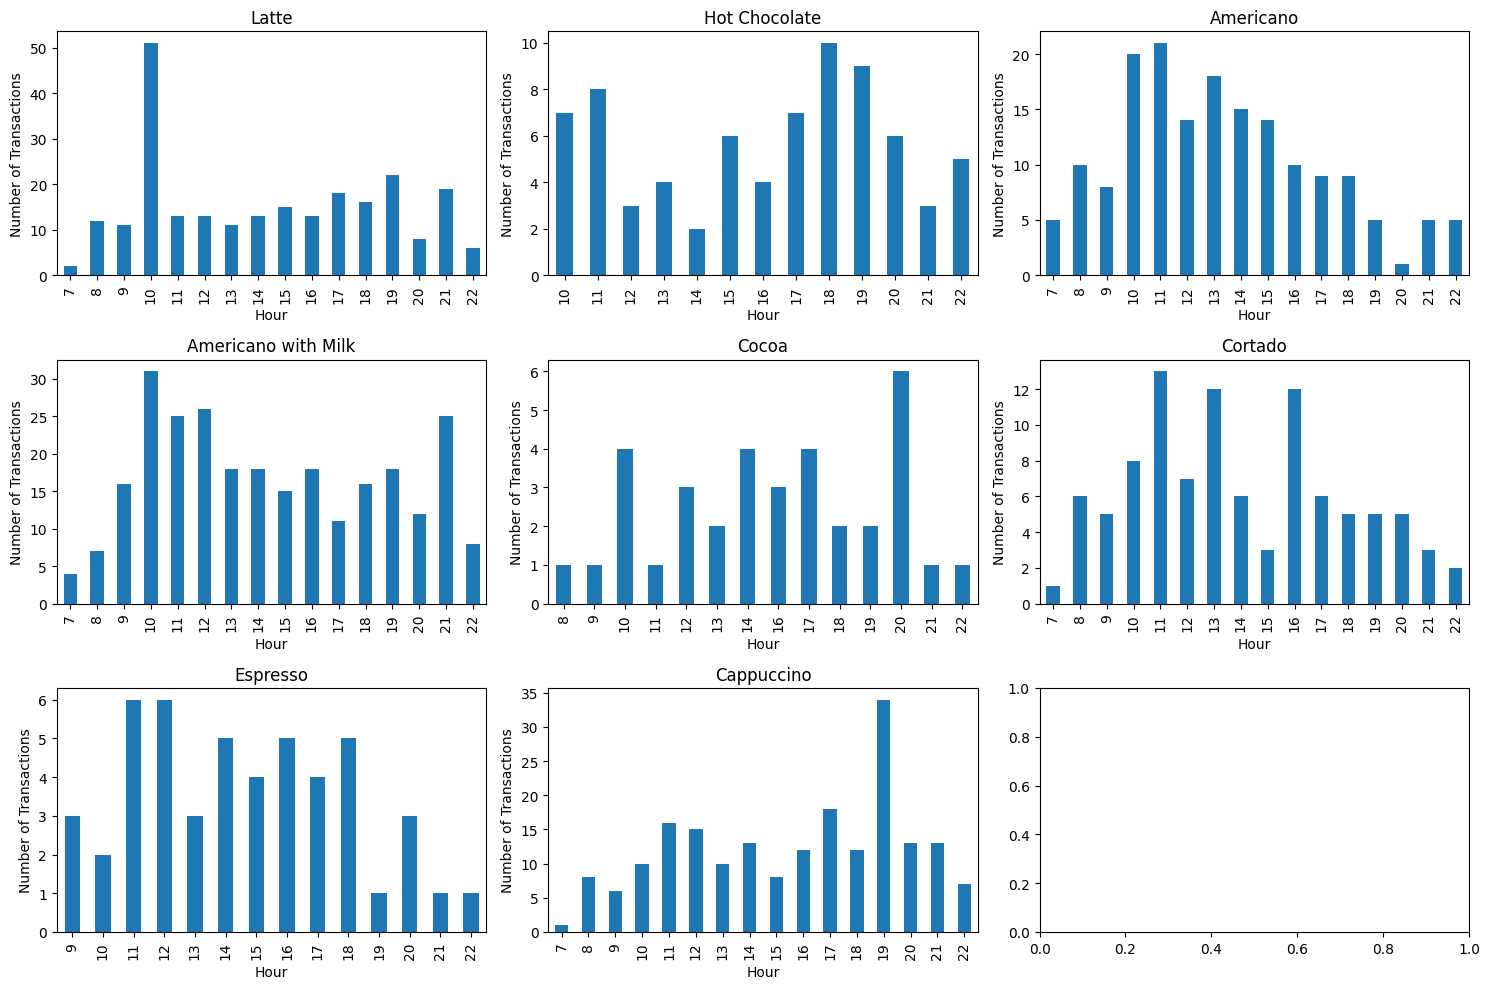

In [ ]:
# Assuming 'datetime' is already in datetime format
# Extract the hour from the datetime column
data['Hour'] = data['datetime'].dt.hour

# List of unique coffee types
coffee_types = data['coffee_name'].unique()

# Create subplots for each coffee type
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Adjust based on the number of coffee types
axes = axes.flatten()

# Loop through each coffee type and plot the transactions by hour
for i, coffee in enumerate(coffee_types):
    # Filter data for each coffee type
    coffee_data = data[data['coffee_name'] == coffee]

    # Plot the number of transactions (or sum of money) by hour
    coffee_data.groupby('Hour').size().plot(kind='bar', ax=axes[i])

    # Set the title and labels
    axes[i].set_title(coffee)
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Number of Transactions')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()